In [16]:
import wandb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

In [17]:
# import wandb
# run = wandb.init()
# artifact = run.use_artifact('eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/rice-primary-2025-01-19_v002:v0', type='model')
# artifact_dir = artifact.download()

In [18]:
# Constants for W&B initialization
ENTITY_NAME = "eberrigan-salk-institute-for-biological-studies"
PROJECT_NAME = "sleap-roots"
REGISTRY = "sleap-roots-models"
CSV_PATH = "metrics.csv"
EXPERIMENT_NAME = "primary-root-model-comparison"
TAGS = ["rice3-5DAG", "soybean6-8DAG", "sorghum5-12DAG", "soybean", "sorghum", "canola2-13DAG", "canola", "pennycress", "arabidopsis", "pennycress14DAG", "arabidopsis7-11DAG", "primary", "2025-01-25", "rice"]
ARTIFACT_NAME = "primary-root-model-metrics"

In [19]:
GROUPS = ["sorghum-soybean-canola-pennycress-rice-arabidopsis-primary-2025-01-20", "canola-pennycress-arabidopsis-primary-2025-01-20", "soybean-primary-2025-01-05", "rice-primary-2025-01-19", "canola-primary-2025-01-19", "pennycress-primary-2025-01-19", "arabidopsis-primary-2025-01-19", "sorghum-soybean-primary-2025-01-07", "sorghum-primary-2025-01-06"]
VERSIONS = ["000", "001", "002"]


In [20]:
def create_artifact_name(group: str, version: str) -> str:
    """Return the artifact name for a given group and version.

    Example: sorghum-soybean-primary-2025-01-07_v001
    Syntax is {group}_v{version}
    
    Args:
        group (str): The group name.
        version (str): The version number.
        
    Returns:
        str: The artifact name.
    """
    return f"{group}_v{version}"


def fetch_model_artifact(run: wandb.run, entity_name: str, project_name: str, registry: str, artifact_name: str, alias: str="latest") -> wandb.Artifact:
    """Return wandb.Artifact object for a given model artifact.
    
    Args:
        run (wandb.Run): The W&B run object.
        entity_name (str): W&B entity name.
        project_name (str): W&B project name.
        registry (str): W&B registry name.
        artifact_name (str): Name of the model artifact.
        alias (str): Alias of the model artifact. Default is "latest".
        
    Returns:
        wandb.Artifact: The model artifact.
    """
    full_artifact_name = f"{entity_name}-org/wandb-registry-{registry}/{artifact_name}:{alias}"
    print(f"Fetching artifact: {full_artifact_name}")
    artifact = run.use_artifact(f"{full_artifact_name}")
    return artifact

def get_distances(artifact: wandb.Artifact):
    """Return the distances dataframe from a model artifact.
    
    Args:
        artifact (wandb.Artifact): The model artifact.
        
    Returns:
        pd.DataFrame: The distances dataframe.
    """
    distances = artifact.get("distances.csv")
    distances_df = pd.read_csv(distances)
    return distances_df

def get_eval_metadata(artifact: wandb.Artifact, metadata_key: str="dist_avg"):
    """Return model artifact metric from metadata.
    
    Args:
        artifact (wandb.Artifact): The model artifact.
        metadata_key (str): The key of the metric to retrieve. Default is "dist_avg".
        
    Returns:
        float: The metric value.
    """
    metadata = artifact.metadata
    return metadata.get(metadata_key)

In [21]:
def main(csv_path: str="metrics.csv"):
    """Main function to fetch model artifacts and save metrics to CSV.

    Args:
        csv_path (str): Path to save the CSV file. Default is "metrics.csv".

    Returns:
        pd.DataFrame: DataFrame containing the metrics or None if no metrics are found.
    """
    # Initialize W&B run
    run = wandb.init(project=PROJECT_NAME, entity=ENTITY_NAME, name=EXPERIMENT_NAME, job_type="fetch_metrics", tags=TAGS, group=EXPERIMENT_NAME)

    # Make dictionary of artifact metrics
    metrics_dict = {}

    # Iterate over all groups and versions
    for group in GROUPS:
        for version in VERSIONS:
            artifact_name = create_artifact_name(group, version)
            artifact = fetch_model_artifact(run=run, entity_name=ENTITY_NAME, project_name=PROJECT_NAME, registry=REGISTRY, artifact_name=artifact_name, alias="latest")
            
            if artifact:
                metadata = artifact.metadata
                metrics_dict[artifact_name] = {
                    "group": group,
                    "version": version,
                    "dist_avg": metadata.get("dist_avg"),
                    "dist_p50": metadata.get("dist_p50"),
                    "dist_p90": metadata.get("dist_p90"),
                    "dist_p95": metadata.get("dist_p95"),
                    "dist_p99": metadata.get("dist_p99")
                }

    # Convert metrics dictionary to dataframe
    if metrics_dict:
        metrics_df = pd.DataFrame.from_dict(metrics_dict, orient="index")
        metrics_df.to_csv(csv_path)
        print(f"Metrics saved to {csv_path}")

        # Create the artifact
        artifact = wandb.Artifact(
            name=ARTIFACT_NAME,
            type="metrics",
            metadata=metrics_dict
        )

        # Add the file to the artifact
        artifact.add_file(csv_path)

        # Log the artifact to the W&B run
        run.log_artifact(artifact)
        run.finish()
        return metrics_df
    else:
        print("No metrics found.")
        run.finish()
        return None

    

In [22]:
metrics = main(csv_path=CSV_PATH)

Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/sorghum-soybean-canola-pennycress-rice-arabidopsis-primary-2025-01-20_v000:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/sorghum-soybean-canola-pennycress-rice-arabidopsis-primary-2025-01-20_v001:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/sorghum-soybean-canola-pennycress-rice-arabidopsis-primary-2025-01-20_v002:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/canola-pennycress-arabidopsis-primary-2025-01-20_v000:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/canola-pennycress-arabidopsis-primary-2025-01-20_v001:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/canola-pennycress-arabidopsis-primary-2025-01-20_v002:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.
wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/soybean-primary-2025-01-05_v000:latest
Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/soybean-primary-2025-01-05_v001:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/soybean-primary-2025-01-05_v002:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/rice-primary-2025-01-19_v000:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.
wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/rice-primary-2025-01-19_v001:latest
Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/rice-primary-2025-01-19_v002:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/canola-primary-2025-01-19_v000:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/canola-primary-2025-01-19_v001:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.
wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/canola-primary-2025-01-19_v002:latest
Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/pennycress-primary-2025-01-19_v000:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.
wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/pennycress-primary-2025-01-19_v001:latest
Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/pennycress-primary-2025-01-19_v002:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/arabidopsis-primary-2025-01-19_v000:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/arabidopsis-primary-2025-01-19_v001:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.
wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/arabidopsis-primary-2025-01-19_v002:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/sorghum-soybean-primary-2025-01-07_v000:latest
Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/sorghum-soybean-primary-2025-01-07_v001:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.
wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/sorghum-soybean-primary-2025-01-07_v002:latest
Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/sorghum-primary-2025-01-06_v000:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/sorghum-primary-2025-01-06_v001:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Fetching artifact: eberrigan-salk-institute-for-biological-studies-org/wandb-registry-sleap-roots-models/sorghum-primary-2025-01-06_v002:latest


wandb: WARNING Registries can be linked/fetched using a shorthand form without specifying the organization name. Try using shorthand path format: <my_registry_name>/<artifact_name> or just <my_registry_name> if fetching just the project.


Metrics saved to metrics.csv


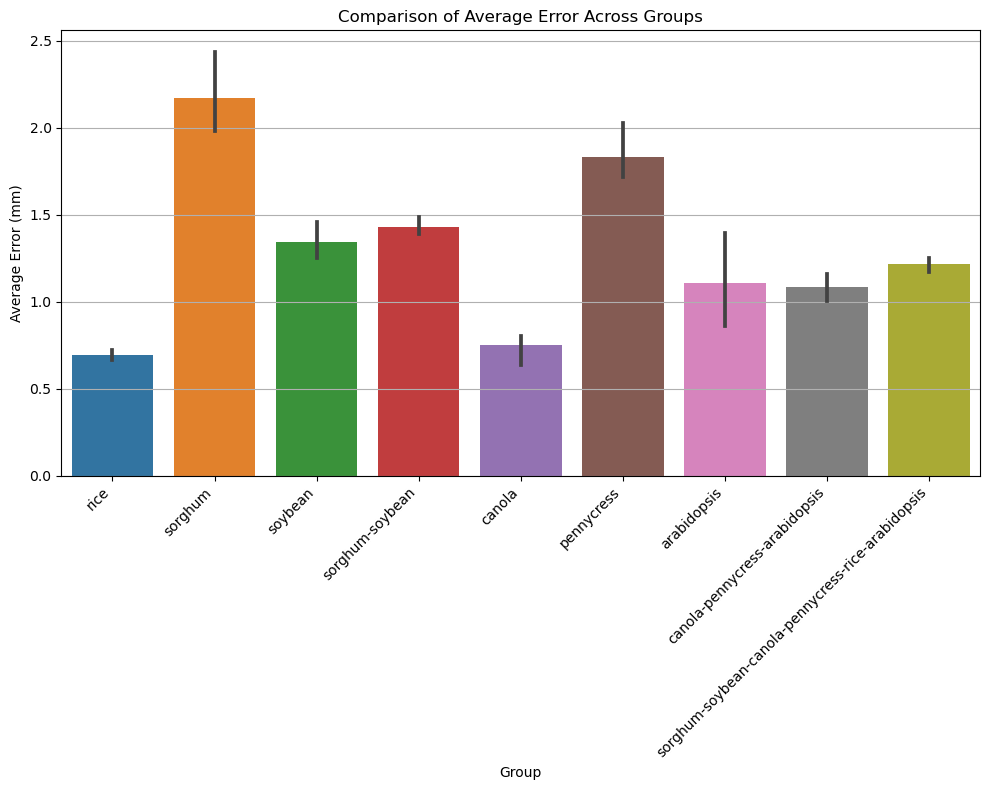

In [23]:
metric = "dist_avg"

# Load metrics file
file_path = CSV_PATH
df = pd.read_csv(file_path)

# Abbreviate group names to only the part before "-primary"
df["group_name"] = df["group"].str.split("-primary").str[0]

# Define the custom order for group names
custom_order = ["rice", "sorghum", "soybean", "sorghum-soybean", "canola", "pennycress", "arabidopsis", "canola-pennycress-arabidopsis", "sorghum-soybean-canola-pennycress-rice-arabidopsis"]

# Set the custom order in the DataFrame
df["group_name"] = pd.Categorical(df["group_name"], categories=custom_order, ordered=True)

# Create the bar plot for dist_avg
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="group_name", y=metric)

plt.title("Comparison of Average Error Across Groups")
plt.xlabel("Group")
plt.ylabel("Average Error (mm)")
plt.grid(axis="y")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save the plot to a file
plt.savefig("primary_root_average_error_comparison.png")

# Display the plot
plt.show()



In [26]:
# Optional: Add the plot to the W&B metrics artifact

# Initialize the W&B run
add_plot_run = wandb.init(project=PROJECT_NAME, entity=ENTITY_NAME, job_type="add_file_to_artifact")

# Use the existing artifact and download its contents
metrics_artifact = add_plot_run.use_artifact(f"{ARTIFACT_NAME}:latest", type="metrics")
artifact_dir = Path(metrics_artifact.download())

# Create a new artifact
new_metrics_artifact = wandb.Artifact(name=ARTIFACT_NAME, type="metrics")

# Add the new file
new_metrics_artifact.add_file("primary_root_average_error_comparison.png")

# Add the files from the existing artifact
for file_path in artifact_dir.iterdir():
    new_metrics_artifact.add_file(file_path)

# Log the new artifact
add_plot_run.log_artifact(new_metrics_artifact)

# Finish the run
add_plot_run.finish()




wandb:   1 of 1 files downloaded.  


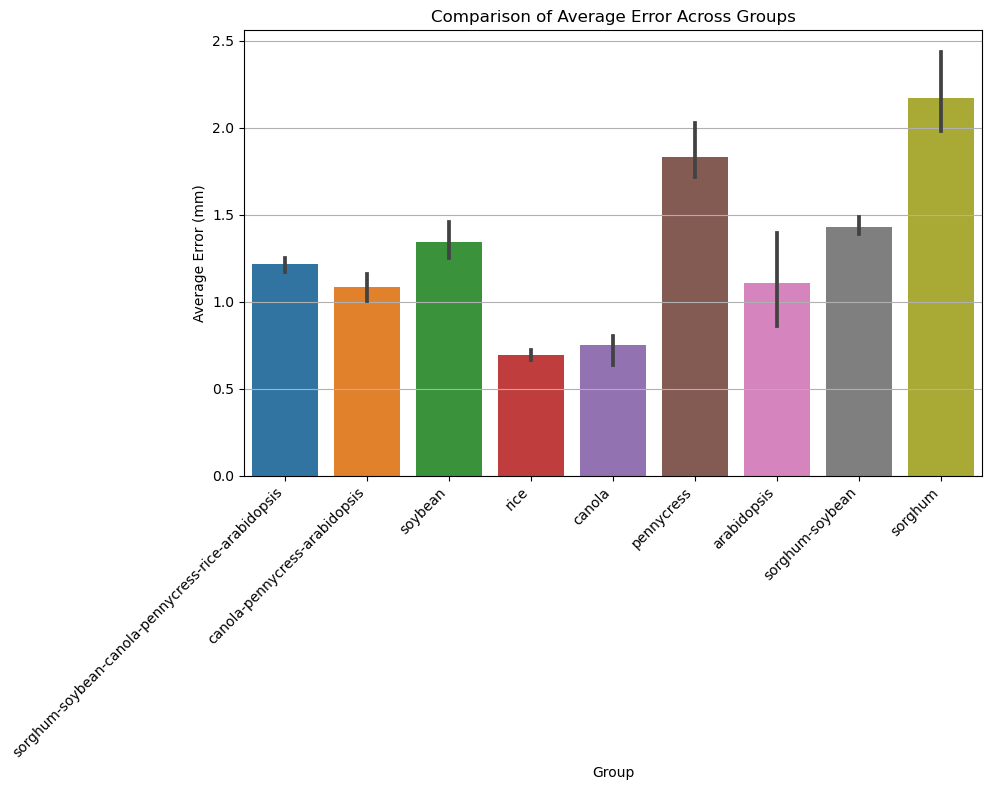

In [25]:
metric = "dist_avg"

# Load metrics file
file_path = CSV_PATH
df = pd.read_csv(file_path)

# Abbreviate group names to only the part before "-primary"
df["group_name"] = df["group"].str.split("-primary").str[0]

# Create the bar plot for dist_avg
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x="group_name", y=metric)

plt.title("Comparison of Average Error Across Groups")
plt.xlabel("Group")
plt.ylabel("Average Error (mm)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()

# Display the plot
plt.show()